# Stay-at-Home

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Online Gaming
title = "Stay-at-Home"
symbols = ['ZM', 'NET', 'BOX', 'DBX', 'AKAM', 'VG', 'EGHT', 'FSLY']
start = '2018-01-01'
end = '2020-06-26'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

434

In [7]:
df.head()

,ZM,NET,BOX,DBX,AKAM,VG,EGHT,FSLY
Date,,,,,,,,
2019-04-18,62.000000,NaN,18.840000,21.25,75.339996,9.30,22.330000,NaN
2019-04-22,65.699997,NaN,19.719999,23.16,76.690002,9.47,22.799999,NaN
2019-04-23,69.000000,NaN,20.260000,23.33,77.660004,9.49,23.170000,NaN
2019-04-24,63.200001,NaN,20.549999,23.40,78.139999,9.48,23.139999,NaN
2019-04-25,65.000000,NaN,20.129999,23.65,78.610001,9.53,23.650000,NaN


In [8]:
df.tail()

,ZM,NET,BOX,DBX,AKAM,VG,EGHT,FSLY
Date,,,,,,,,
2020-06-19,243.479996,36.000000,19.790001,23.299999,100.470001,9.90,15.15,63.689999
2020-06-22,251.270004,37.000000,22.059999,23.510000,101.589996,10.07,15.67,73.269997
2020-06-23,252.809998,35.400002,20.790001,23.650000,100.879997,9.83,15.71,75.900002
2020-06-24,255.899994,35.000000,20.330000,22.639999,100.970001,9.50,14.93,76.070000
2020-06-25,259.510010,36.000000,20.950001,22.160000,102.889999,9.82,15.51,81.669998


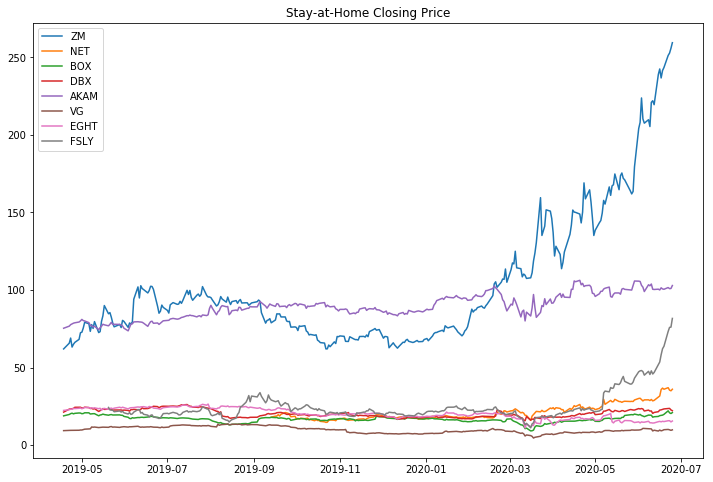

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

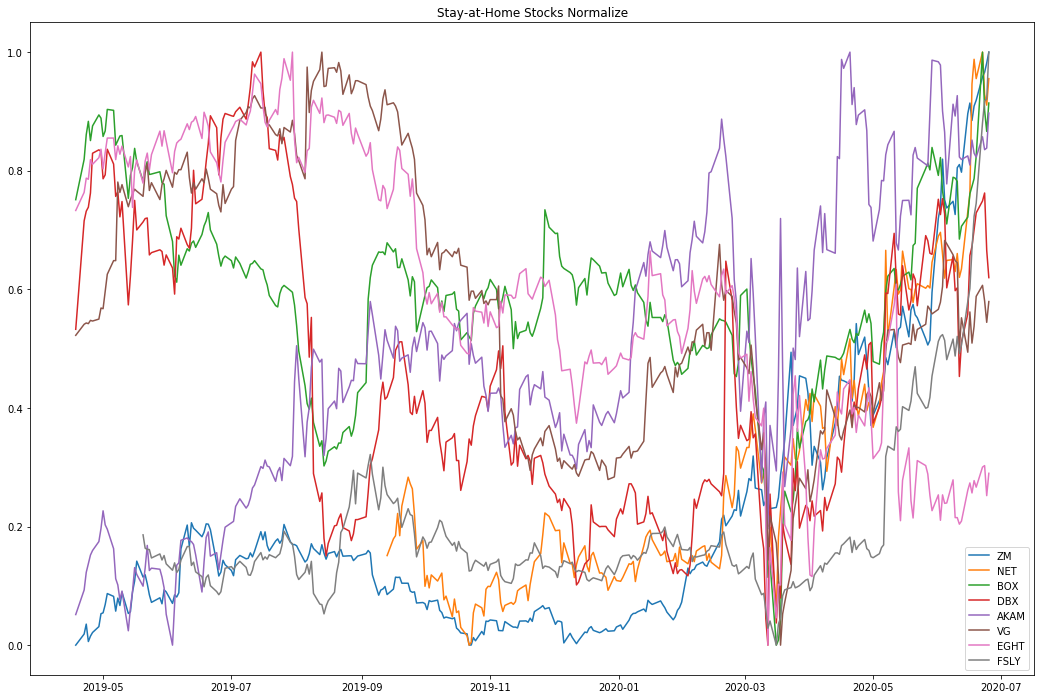

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

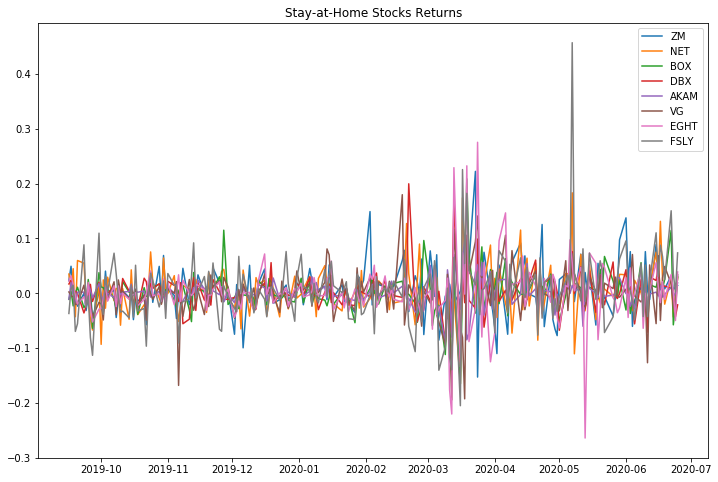

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

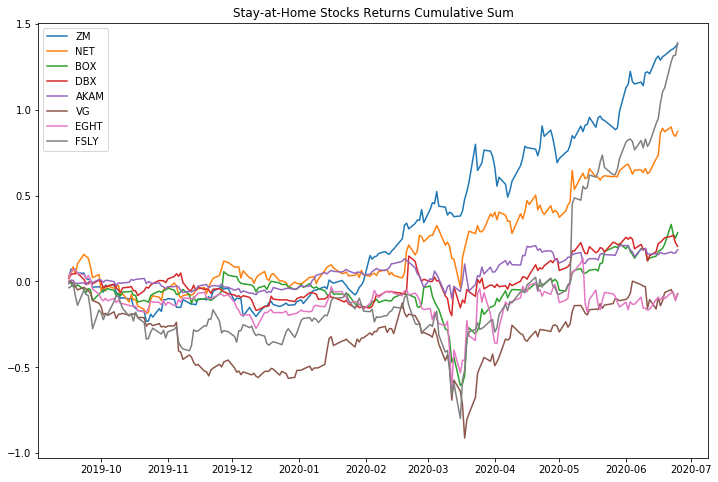

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

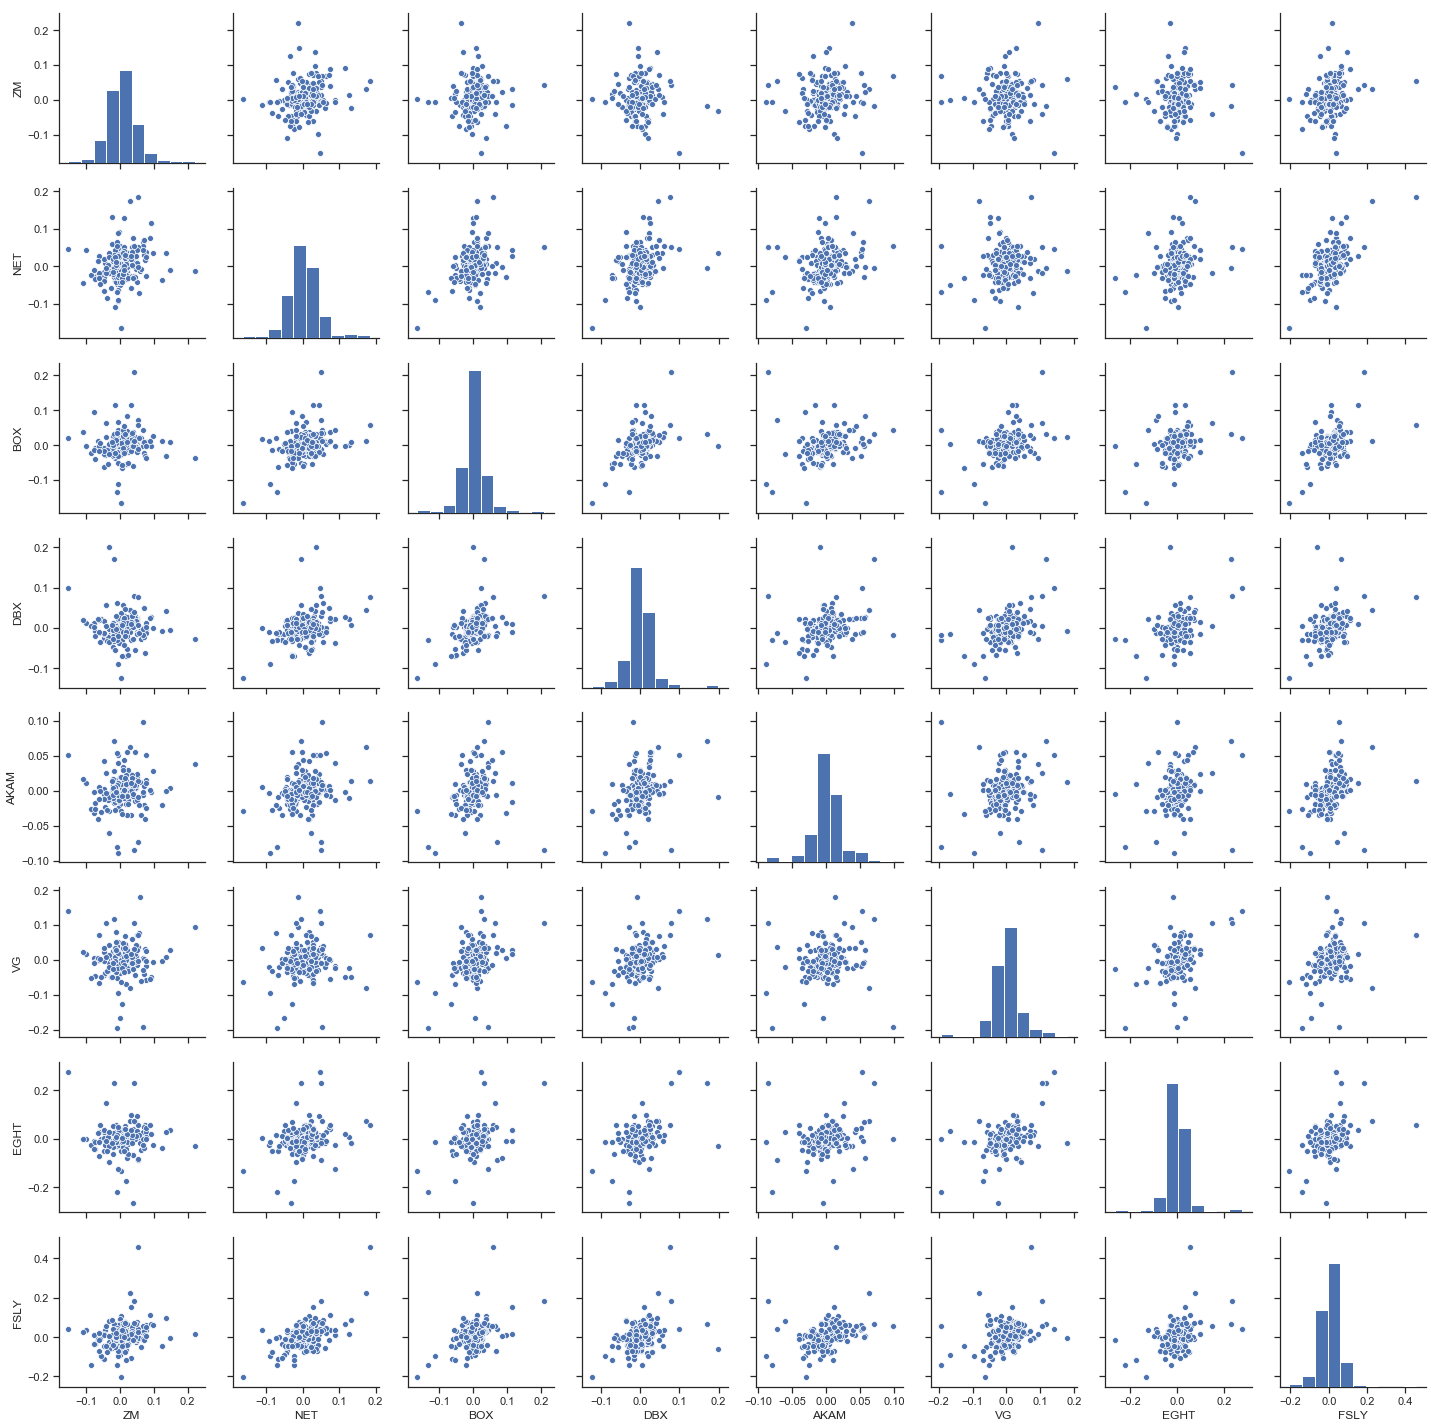

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

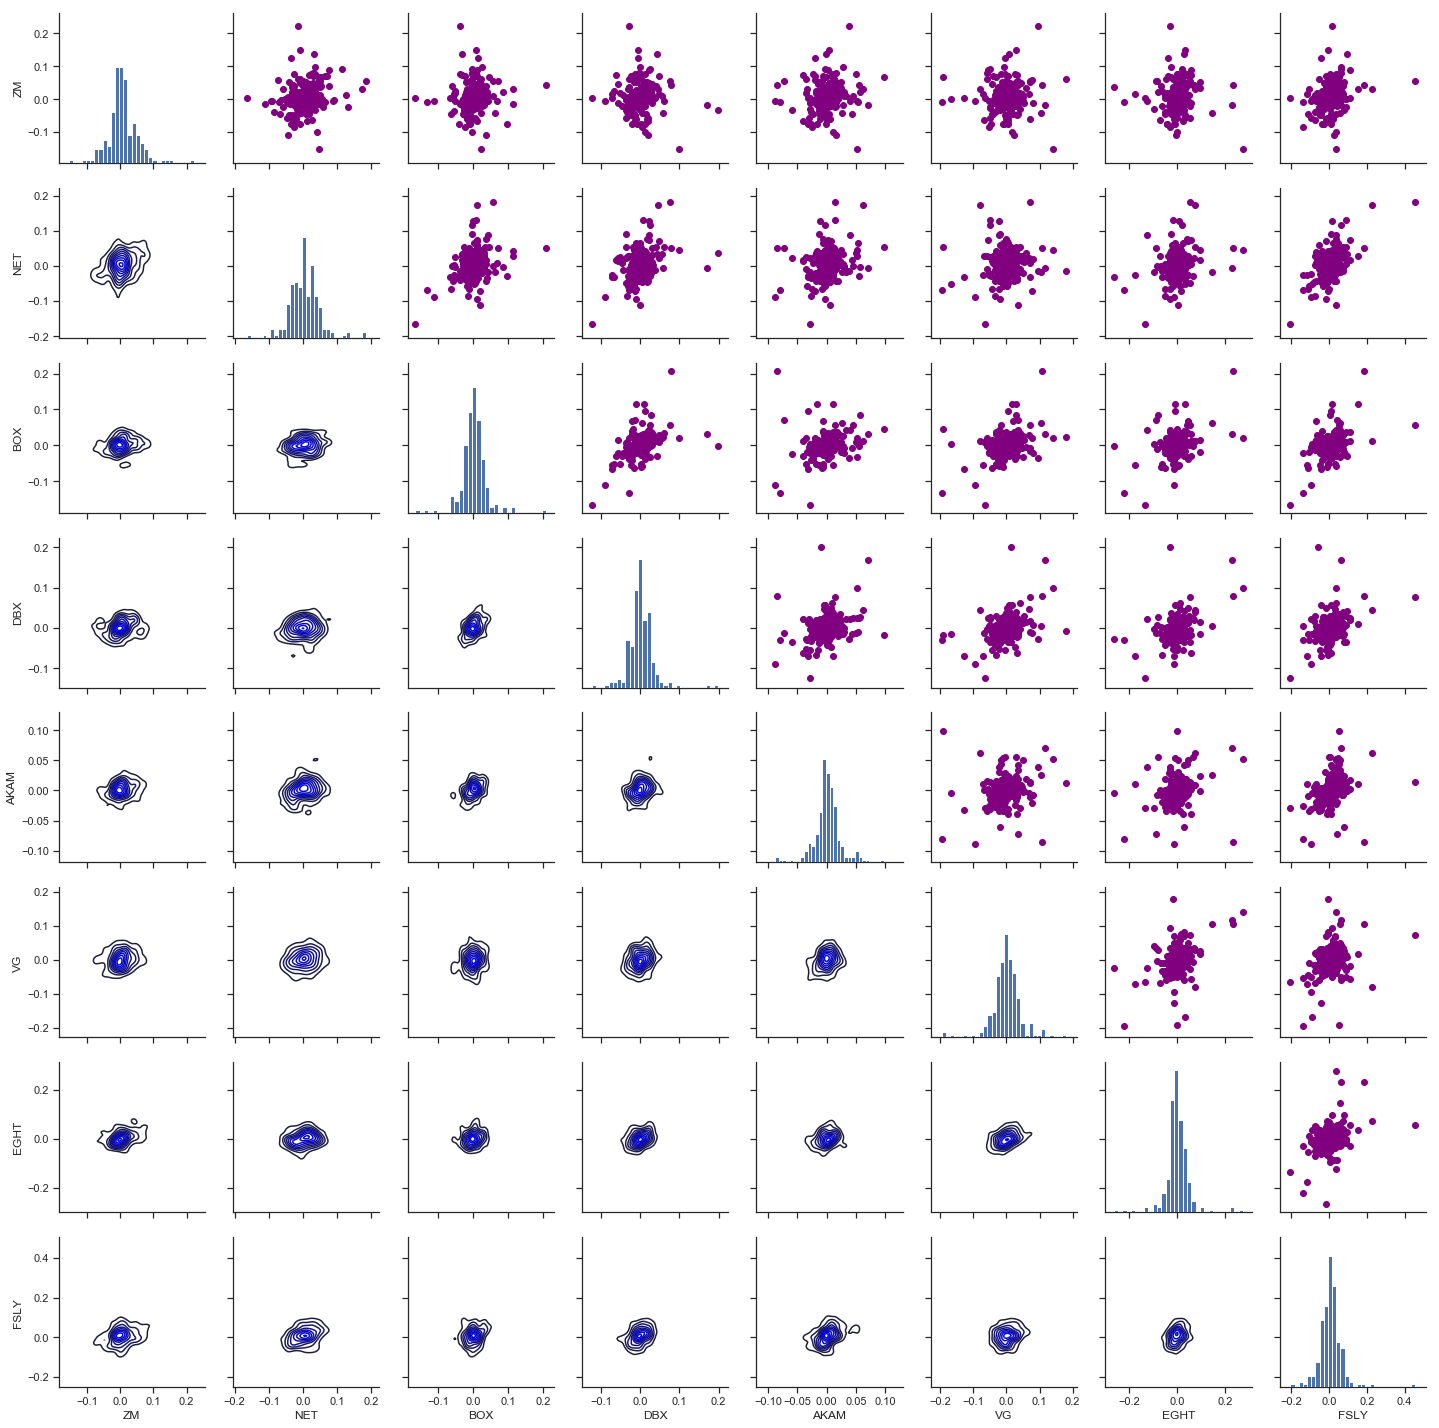

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

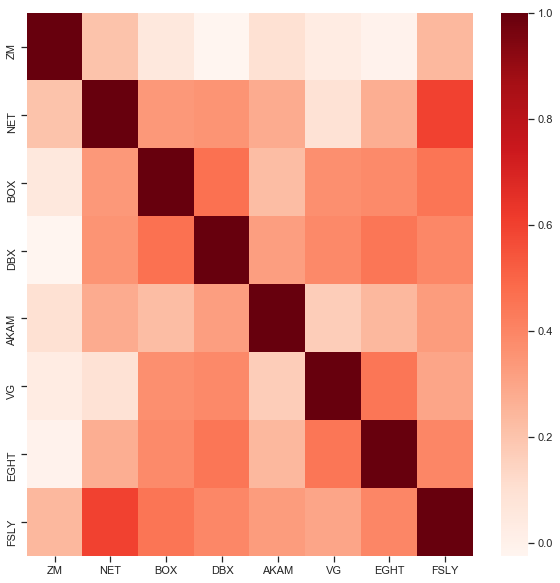

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

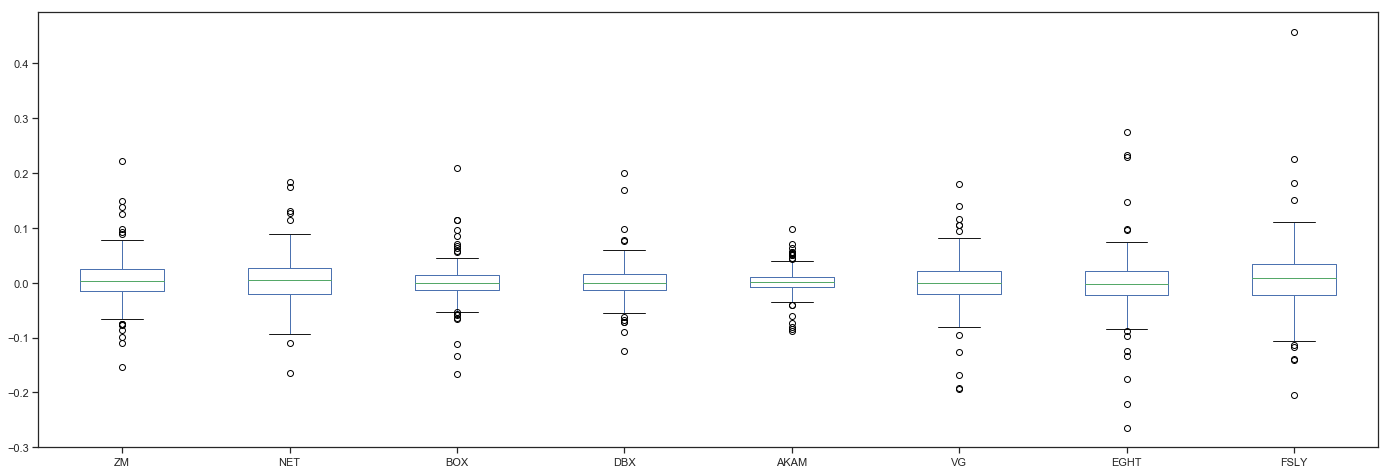

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

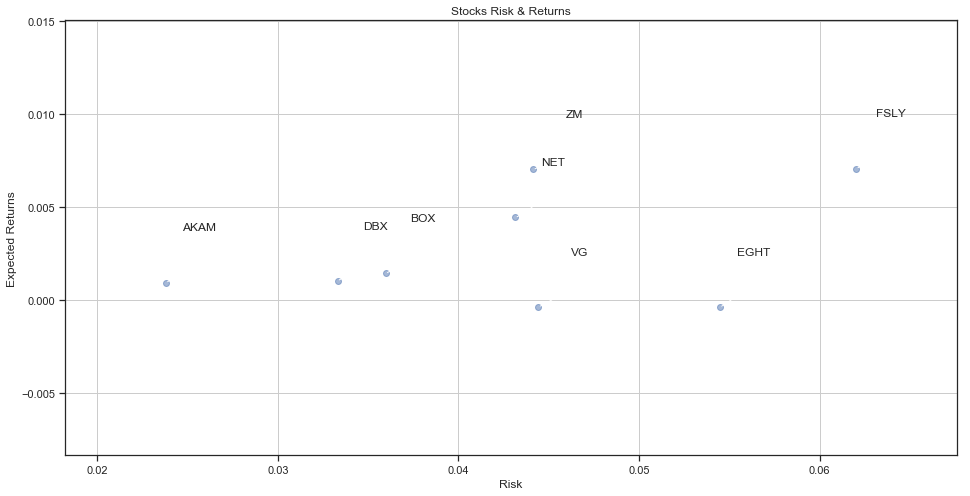

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

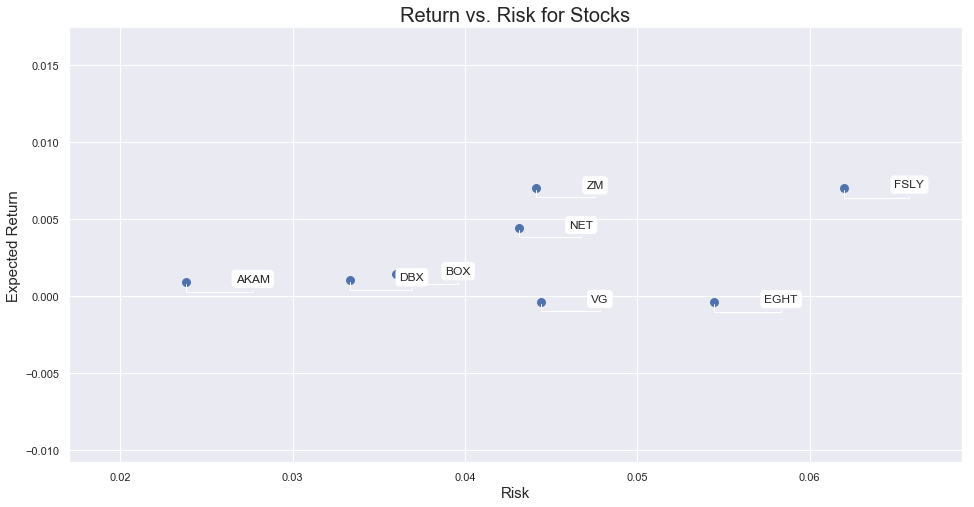

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

FSLY  FSLY    1.000000
EGHT  EGHT    1.000000
NET   NET     1.000000
BOX   BOX     1.000000
DBX   DBX     1.000000
AKAM  AKAM    1.000000
VG    VG      1.000000
ZM    ZM      1.000000
NET   FSLY    0.597302
FSLY  NET     0.597302
BOX   DBX     0.464662
DBX   BOX     0.464662
FSLY  BOX     0.454707
BOX   FSLY    0.454707
EGHT  VG      0.450575
VG    EGHT    0.450575
EGHT  DBX     0.447838
DBX   EGHT    0.447838
EGHT  FSLY    0.396175
FSLY  EGHT    0.396175
      DBX     0.391561
DBX   FSLY    0.391561
VG    DBX     0.390427
DBX   VG      0.390427
EGHT  BOX     0.386241
BOX   EGHT    0.386241
VG    BOX     0.368922
BOX   VG      0.368922
DBX   NET     0.352223
NET   DBX     0.352223
                ...   
AKAM  DBX     0.322401
DBX   AKAM    0.322401
VG    FSLY    0.299503
FSLY  VG      0.299503
AKAM  NET     0.281727
NET   AKAM    0.281727
      EGHT    0.273355
EGHT  NET     0.273355
FSLY  ZM      0.241868
ZM    FSLY    0.241868
EGHT  AKAM    0.239443
AKAM  EGHT    0.239443
BOX   AKAM 

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,ZM,NET,BOX,DBX,AKAM,VG,EGHT,FSLY
Date,,,,,,,,
2019-09-16,0.468994,0.574123,0.412788,0.435089,0.415626,0.525974,0.530976,0.254073
2019-09-17,0.538675,0.492037,0.453225,0.455444,0.578825,0.509361,0.548714,0.322171
2019-09-18,0.404609,0.602292,0.380980,0.394512,0.459675,0.500988,0.518605,0.331714
2019-09-19,0.409652,0.350275,0.442654,0.392991,0.374653,0.465196,0.482580,0.204650
2019-09-20,0.344734,0.645215,0.471910,0.382660,0.484023,0.466201,0.453054,0.225741


In [23]:
Normalized_Value.corr()

,ZM,NET,BOX,DBX,AKAM,VG,EGHT,FSLY
ZM,1.000000,0.206576,0.057958,-0.025090,0.100535,0.031301,-0.007681,0.241868
NET,0.206576,1.000000,0.341690,0.352223,0.281727,0.094862,0.273355,0.597302
BOX,0.057958,0.341690,1.000000,0.464662,0.223804,0.368922,0.386241,0.454707
DBX,-0.025090,0.352223,0.464662,1.000000,0.322401,0.390427,0.447838,0.391561
AKAM,0.100535,0.281727,0.223804,0.322401,1.000000,0.167815,0.239443,0.331017
VG,0.031301,0.094862,0.368922,0.390427,0.167815,1.000000,0.450575,0.299503
EGHT,-0.007681,0.273355,0.386241,0.447838,0.239443,0.450575,1.000000,0.396175
FSLY,0.241868,0.597302,0.454707,0.391561,0.331017,0.299503,0.396175,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

FSLY  FSLY    1.000000
EGHT  EGHT    1.000000
NET   NET     1.000000
BOX   BOX     1.000000
DBX   DBX     1.000000
AKAM  AKAM    1.000000
VG    VG      1.000000
ZM    ZM      1.000000
NET   FSLY    0.597302
FSLY  NET     0.597302
BOX   DBX     0.464662
DBX   BOX     0.464662
FSLY  BOX     0.454707
BOX   FSLY    0.454707
EGHT  VG      0.450575
VG    EGHT    0.450575
EGHT  DBX     0.447838
DBX   EGHT    0.447838
EGHT  FSLY    0.396175
FSLY  EGHT    0.396175
      DBX     0.391561
DBX   FSLY    0.391561
VG    DBX     0.390427
DBX   VG      0.390427
EGHT  BOX     0.386241
BOX   EGHT    0.386241
VG    BOX     0.368922
BOX   VG      0.368922
DBX   NET     0.352223
NET   DBX     0.352223
                ...   
AKAM  DBX     0.322401
DBX   AKAM    0.322401
VG    FSLY    0.299503
FSLY  VG      0.299503
AKAM  NET     0.281727
NET   AKAM    0.281727
      EGHT    0.273355
EGHT  NET     0.273355
FSLY  ZM      0.241868
ZM    FSLY    0.241868
EGHT  AKAM    0.239443
AKAM  EGHT    0.239443
BOX   AKAM 

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
ZM      0.007017
NET     0.004440
BOX     0.001439
DBX     0.001042
AKAM    0.000939
VG     -0.000360
EGHT   -0.000374
FSLY    0.007064
dtype: float64
--------------------------------------------------
Stock risks:
ZM      0.044142
NET     0.043151
BOX     0.035968
DBX     0.033302
AKAM    0.023795
VG      0.044427
EGHT    0.054481
FSLY    0.062025
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
EGHT,-0.000374,0.054481
VG,-0.000360,0.044427
AKAM,0.000939,0.023795
DBX,0.001042,0.033302
BOX,0.001439,0.035968
NET,0.004440,0.043151
ZM,0.007017,0.044142
FSLY,0.007064,0.062025


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
AKAM,0.000939,0.023795
DBX,0.001042,0.033302
BOX,0.001439,0.035968
NET,0.004440,0.043151
ZM,0.007017,0.044142
VG,-0.000360,0.044427
EGHT,-0.000374,0.054481
FSLY,0.007064,0.062025


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
ZM,0.007017,0.044142,-0.067573
NET,0.004440,0.043151,-0.128854
BOX,0.001439,0.035968,-0.238014
DBX,0.001042,0.033302,-0.268983
AKAM,0.000939,0.023795,-0.380799
VG,-0.000360,0.044427,-0.233197
EGHT,-0.000374,0.054481,-0.190419
FSLY,0.007064,0.062025,-0.047334


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
ZM,0.007017,0.044142,-0.067573,0.222214,-0.152795,0.003629,1.410714
NET,0.004440,0.043151,-0.128854,0.183166,-0.164743,0.004199,2.857143
BOX,0.001439,0.035968,-0.238014,0.208506,-0.165599,0.000000,3.049684
DBX,0.001042,0.033302,-0.268983,0.199573,-0.123706,0.000000,-2.120139
AKAM,0.000939,0.023795,-0.380799,0.098044,-0.088281,0.000584,1.901553
VG,-0.000360,0.044427,-0.233197,0.179713,-0.194483,0.000000,3.368418
EGHT,-0.000374,0.054481,-0.190419,0.275236,-0.263957,-0.001521,3.884795
FSLY,0.007064,0.062025,-0.047334,0.456833,-0.205000,0.008060,7.361639


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
ZM,0.007017,0.044142,-0.067573,0.222214,-0.152795,0.003629,1.410714,0.000032
NET,0.004440,0.043151,-0.128854,0.183166,-0.164743,0.004199,2.857143,0.000065
BOX,0.001439,0.035968,-0.238014,0.208506,-0.165599,0.000000,3.049684,0.000069
DBX,0.001042,0.033302,-0.268983,0.199573,-0.123706,0.000000,-2.120139,-0.000049
AKAM,0.000939,0.023795,-0.380799,0.098044,-0.088281,0.000584,1.901553,0.000043
VG,-0.000360,0.044427,-0.233197,0.179713,-0.194483,0.000000,3.368418,0.000076
EGHT,-0.000374,0.054481,-0.190419,0.275236,-0.263957,-0.001521,3.884795,0.000088
FSLY,0.007064,0.062025,-0.047334,0.456833,-0.205000,0.008060,7.361639,0.000164


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
ZM,0.007017,0.044142,-0.067573,0.222214,-0.152795,0.003629,1.410714,0.000032,1.296272
NET,0.004440,0.043151,-0.128854,0.183166,-0.164743,0.004199,2.857143,0.000065,NaN
BOX,0.001439,0.035968,-0.238014,0.208506,-0.165599,0.000000,3.049684,0.000069,0.063579
DBX,0.001042,0.033302,-0.268983,0.199573,-0.123706,0.000000,-2.120139,-0.000049,0.024646
AKAM,0.000939,0.023795,-0.380799,0.098044,-0.088281,0.000584,1.901553,0.000043,0.198364
VG,-0.000360,0.044427,-0.233197,0.179713,-0.194483,0.000000,3.368418,0.000076,0.032095
EGHT,-0.000374,0.054481,-0.190419,0.275236,-0.263957,-0.001521,3.884795,0.000088,-0.190723
FSLY,0.007064,0.062025,-0.047334,0.456833,-0.205000,0.008060,7.361639,0.000164,NaN


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
DBX,0.001042,0.033302,-0.268983,0.199573,-0.123706,0.000000,-2.120139,-0.000049,0.024646
ZM,0.007017,0.044142,-0.067573,0.222214,-0.152795,0.003629,1.410714,0.000032,1.296272
AKAM,0.000939,0.023795,-0.380799,0.098044,-0.088281,0.000584,1.901553,0.000043,0.198364
NET,0.004440,0.043151,-0.128854,0.183166,-0.164743,0.004199,2.857143,0.000065,NaN
BOX,0.001439,0.035968,-0.238014,0.208506,-0.165599,0.000000,3.049684,0.000069,0.063579
VG,-0.000360,0.044427,-0.233197,0.179713,-0.194483,0.000000,3.368418,0.000076,0.032095
EGHT,-0.000374,0.054481,-0.190419,0.275236,-0.263957,-0.001521,3.884795,0.000088,-0.190723
FSLY,0.007064,0.062025,-0.047334,0.456833,-0.205000,0.008060,7.361639,0.000164,NaN
